In [1]:
#%%
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from dotenv import load_dotenv
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
from app.pg import DatabasePostgre, Table

#%%
load_dotenv()
DB_NAME = os.getenv('DB_NAME')
DB_USER = os.getenv('DB_USER')
DB_PASS = os.getenv('DB_PASS')
DB_NAME = os.getenv('DB_NAME')
DB_HOST = os.getenv('DB_HOST')
DB_PORT = os.getenv('DB_PORT')

#%%
ib = DatabasePostgre(dialect='postgresql', driver='psycopg2', db=DB_NAME, user=DB_USER, password=DB_PASS, host=DB_HOST, port=DB_PORT)

coletas_silver = Table('coletas', ib, 'silver')
df_coletas = coletas_silver.read()

setup_silver = Table('setup', ib, 'silver')
df_setup = setup_silver.read()
#%%
type(df_coletas)

C:\Users\maiar\OneDrive\Data Material\Ascential - Analytics Engineering\app\pg.py:95: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql=sql, con=self.db.connection)


pandas.core.frame.DataFrame

In [2]:
%matplotlib inline 

In [3]:
df_coletas.dtypes

DateIns                           object
Screenshot                        object
Available                          int64
Unavailable                        int64
SuggestedPrice                   float64
FinalPrice                       float64
MasterKey_RetailerProduct         object
RandomPrecosNegativos              int64
RandomPrecosMissing              float64
RandomPrecosDiscrepantes           int64
RandomPrecosDiscrepantesFator    float64
dtype: object

In [4]:
df_coletas['DateIns'] = df_coletas['DateIns'].apply(lambda x: pd.Timestamp(x))

In [5]:
df = df_coletas.merge(df_setup, on='MasterKey_RetailerProduct')

In [6]:
df.groupby(['Customer', 'Retailer']).agg({'EAN': ['count', 'nunique']})

EAN        
                                   count nunique
Customer Retailer                               
Aché     A Nossa Drogaria          55710     914
         Araujo                    55754     914
         DrogaRaia                 55754     914
         DrogaSil                  55754     914
         Drogal                    55754     914
...                                  ...     ...
Unilever Supermercado Mambo        18423     303
         Supermercado Pague Menos  18422     302
         Tenda Drive               12688     208
         Venancio                  13737     227
         Zona Sul                  20924     344

[165 rows x 2 columns]

In [7]:
retailer_customer = df.groupby(['Retailer']).agg({'Customer': ['count', 'nunique']})

In [8]:
retailer_customer[('Customer', 'nunique')].value_counts()

(Customer, nunique)
1    87
2    21
3    12
Name: count, dtype: int64

In [9]:
features = df[df['SuggestedPrice'] > 1][['Available', 'SuggestedPrice', 'FinalPrice', 'MasterKey_RetailerProduct', 'Customer', 'Brand', 'EAN', 'Product', 'Retailer']]

In [10]:
def pct_change(x):
    try:
        result = (x['FinalPrice'] - x['SuggestedPrice']) / x['SuggestedPrice']
        return result
    except:
        return np.nan
        
        

features['Pct_Var_Price'] = df.apply(lambda x: pct_change(x), axis=1)

In [11]:
features.tail(50)

,Available,SuggestedPrice,FinalPrice,MasterKey_RetailerProduct,Customer,Brand,EAN,Product,Retailer,Pct_Var_Price
3691066,0,49.49,NaN,BRSeara7894904205158205159Cornershop - Atacadã...,Seara,Seara Gourmet,7894904205158,Bacon tablete Seara Gourmet,Cornershop - Atacadão - Uberlândia,NaN
3691067,0,49.49,NaN,BRSeara7894904205158205159Cornershop - Atacadã...,Seara,Seara Gourmet,7894904205158,Bacon tablete Seara Gourmet,Cornershop - Atacadão - Uberlândia,NaN
3691068,0,49.49,NaN,BRSeara7894904205158205159Cornershop - Atacadã...,Seara,Seara Gourmet,7894904205158,Bacon tablete Seara Gourmet,Cornershop - Atacadão - Uberlândia,NaN
3691069,0,49.49,NaN,BRSeara7894904205158205159Cornershop - Atacadã...,Seara,Seara Gourmet,7894904205158,Bacon tablete Seara Gourmet,Cornershop - Atacadão - Uberlândia,NaN
3691070,0,49.49,NaN,BRSeara7894904205158205159Cornershop - Atacadã...,Seara,Seara Gourmet,7894904205158,Bacon tablete Seara Gourmet,Cornershop - Atacadão - Uberlândia,NaN
3691071,0,49.49,NaN,BRSeara7894904205158205159Cornershop - Atacadã...,Seara,Seara Gourmet,7894904205158,Bacon tablete Seara Gourmet,Cornershop - Atacadão - Uberlândia,NaN
3691072,0,49.49,NaN,BRSeara7894904205158205159Cornershop - Atacadã...,Seara,Seara Gourmet,7894904205158,Bacon tablete Seara Gourmet,Cornershop - Atacadão - Uberlândia,NaN
3691073,0,49.49,NaN,BRSeara7894904205158205159Cornershop - Atacadã...,Seara,Seara Gourmet,7894904205158,Bacon tablete Seara Gourmet,Cornershop - Atacadão - Uberlândia,NaN
3691074,0,49.49,NaN,BRSeara7894904205158205159Cornershop - Atacadã...,Seara,Seara Gourmet,7894904205158,Bacon tablete Seara Gourmet,Cornershop - Atacadão - Uberlândia,NaN
3691075,0,49.49,NaN,BRSeara7894904205158205159Cornershop - Atacadã...,Seara,Seara Gourmet,7894904205158,Bacon tablete Seara Gourmet,Cornershop - Atacadão - Uberlândia,NaN


In [12]:
def _10th(x):
    return x.quantile(0.10)
def _25th(x):
    return x.quantile(0.25)
def _50th(x):
    return x.quantile(0.50)
def _75th(x):
    return x.quantile(0.75)
def _90th(x):
    return x.quantile(0.90)

In [13]:
df

,DateIns,Screenshot,Available,Unavailable,SuggestedPrice,FinalPrice,MasterKey_RetailerProduct,RandomPrecosNegativos,RandomPrecosMissing,RandomPrecosDiscrepantes,RandomPrecosDiscrepantesFator,Customer,Department,Category,Brand,EAN,Product,Retailer
0,2023-06-16,https://s3.amazonaws.com/intellibrand-data-min...,1,0,1.0,77.28,BRAché78961819276937896181927693Farmacia Rosario,1,1.0,0,1.0,Aché,DESVENLAFAXINA,GENÉRICOS,DESVENLAFAXINA,7896181927693,DESVENLAFAXINA 50MG COMR BLX30 (C1),Farmacia Rosario
1,2023-06-17,https://s3.amazonaws.com/intellibrand-data-min...,1,0,1.0,77.28,BRAché78961819276937896181927693Farmacia Rosario,1,1.0,0,1.0,Aché,DESVENLAFAXINA,GENÉRICOS,DESVENLAFAXINA,7896181927693,DESVENLAFAXINA 50MG COMR BLX30 (C1),Farmacia Rosario
2,2023-06-11,https://s3.amazonaws.com/intellibrand-data-min...,1,0,1.0,77.28,BRAché78961819276937896181927693Farmacia Rosario,1,1.0,0,1.0,Aché,DESVENLAFAXINA,GENÉRICOS,DESVENLAFAXINA,7896181927693,DESVENLAFAXINA 50MG COMR BLX30 (C1),Farmacia Rosario
3,2023-06-12,https://s3.amazonaws.com/intellibrand-data-min...,1,0,1.0,77.28,BRAché78961819276937896181927693Farmacia Rosario,1,1.0,0,1.0,Aché,DESVENLAFAXINA,GENÉRICOS,DESVENLAFAXINA,7896181927693,DESVENLAFAXINA 50MG COMR BLX30 (C1),Farmacia Rosario
4,2023-06-13,https://s3.amazonaws.com/intellibrand-data-min...,1,0,1.0,77.28,BRAché78961819276937896181927693Farmacia Rosario,-1,1.0,0,1.0,Aché,DESVENLAFAXINA,GENÉRICOS,DESVENLAFAXINA,7896181927693,DESVENLAFAXINA 50MG COMR BLX30 (C1),Farmacia Rosario
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3773611,2023-05-23,https://screenshot.intellibrand.ai/?reference=...,1,0,1.0,85.79,BRAché78961819277307896181927730Farmacia Rosario,-1,1.0,0,1.0,Aché,DESVENLAFAXINA,GENÉRICOS,DESVENLAFAXINA,7896181927730,DESVENLAFAXINA 100MG COMR BLX30 (C1),Farmacia Rosario
3773612,2023-05-24,https://s3.amazonaws.com/intellibrand-data-min...,1,0,1.0,85.79,BRAché78961819277307896181927730Farmacia Rosario,1,1.0,0,1.0,Aché,DESVENLAFAXINA,GENÉRICOS,DESVENLAFAXINA,7896181927730,DESVENLAFAXINA 100MG COMR BLX30 (C1),Farmacia Rosario
3773613,2023-05-25,https://s3.amazonaws.com/intellibrand-data-min...,1,0,1.0,85.79,BRAché78961819277307896181927730Farmacia Rosario,1,1.0,0,1.0,Aché,DESVENLAFAXINA,GENÉRICOS,DESVENLAFAXINA,7896181927730,DESVENLAFAXINA 100MG COMR BLX30 (C1),Farmacia Rosario
3773614,2023-05-26,https://s3.amazonaws.com/intellibrand-data-min...,1,0,1.0,85.79,BRAché78961819277307896181927730Farmacia Rosario,-1,1.0,0,1.0,Aché,DESVENLAFAXINA,GENÉRICOS,DESVENLAFAXINA,7896181927730,DESVENLAFAXINA 100MG COMR BLX30 (C1),Farmacia Rosario


In [14]:
price_ean = df.groupby(['EAN']).agg({'FinalPrice':'median'})
price_ean.reset_index(inplace=True)
price_ean.columns = ['EAN', 'FinalPrice_median']

In [15]:
price_df = df.merge(price_ean, on='EAN')

In [16]:
def pct_change(x):
    try:
        result = (x['FinalPrice'] - x['FinalPrice_median']) / x['FinalPrice_median']
        return result
    except:
        return np.nan

price_df['Pct_Var_Price'] = price_df.apply(lambda x: pct_change(x), axis=1)

In [17]:
price_df.columns

Index(['DateIns', 'Screenshot', 'Available', 'Unavailable', 'SuggestedPrice',
       'FinalPrice', 'MasterKey_RetailerProduct', 'RandomPrecosNegativos',
       'RandomPrecosMissing', 'RandomPrecosDiscrepantes',
       'RandomPrecosDiscrepantesFator', 'Customer', 'Department', 'Category',
       'Brand', 'EAN', 'Product', 'Retailer', 'FinalPrice_median',
       'Pct_Var_Price'],
      dtype='object')

In [18]:
price_df_retailer_ean = price_df.groupby(['Retailer', 'EAN']).agg({ 'Pct_Var_Price': [_10th, _25th, _50th, _75th, _90th],
                                                                    'Available': 'mean'})
price_df_retailer_ean.reset_index(inplace=True)

In [19]:
price_df_retailer_ean

Retailer            EAN Pct_Var_Price                      \
                                               _10th     _25th     _50th   
0      A Nossa Drogaria  5000456073240      0.078748  0.081151  0.141218   
1      A Nossa Drogaria  7896181900085      0.218951  0.218951  0.218951   
2      A Nossa Drogaria  7896181900115      0.171878  0.171878  0.171878   
3      A Nossa Drogaria  7896181900122           NaN       NaN       NaN   
4      A Nossa Drogaria  7896181900207           NaN       NaN       NaN   
...                 ...            ...           ...       ...       ...   
62295          Zona Sul    79400301161           NaN       NaN       NaN   
62296          Zona Sul   824980331069           NaN       NaN       NaN   
62297          Zona Sul  8710522675908     -0.103288 -0.103288 -0.103288   
62298          Zona Sul  8715200813061           NaN       NaN       NaN   
62299          Zona Sul  8720181040252      0.005349  0.005349  0.069534   

                          Available  
          _75th     _90th      mean  
0      0.141218  0.141218  1.000000  
1      0.218951  0.218951  1.000000  
2      0.171878  0.171878  1.000000  
3           NaN       NaN  0.000000  
4           NaN       NaN  0.000000  
...         ...       ...       ...  
62295       NaN       NaN  0.000000  
62296       NaN       NaN  0.000000  
62297  0.180717  0.180717  1.000000  
62298       NaN       NaN  0.000000  
62299  0.069534  0.069534  0.918033  

[62300 rows x 8 columns]

In [20]:
price_df_retailer_ean.columns

MultiIndex([(     'Retailer',      ''),
            (          'EAN',      ''),
            ('Pct_Var_Price', '_10th'),
            ('Pct_Var_Price', '_25th'),
            ('Pct_Var_Price', '_50th'),
            ('Pct_Var_Price', '_75th'),
            ('Pct_Var_Price', '_90th'),
            (    'Available',  'mean')],
           )

In [21]:
price_df = price_df_retailer_ean.groupby(['Retailer']).agg({('Pct_Var_Price', '_10th'):'mean', 
                                              ('Pct_Var_Price', '_25th'):'mean', 
                                              ('Pct_Var_Price', '_50th'):'mean', 
                                              ('Pct_Var_Price', '_75th'):'mean', 
                                              ('Pct_Var_Price', '_90th'):'mean', 
                                              ('Pct_Var_Price', '_10th'):'mean', 
                                              ('Available', 'mean'):'mean'})
price_df.reset_index(inplace=True)

In [22]:
price_df.reset_index()
price_df.columns = [''.join(column) for column in price_df.columns.values]

In [23]:
price_df.columns

Index(['Retailer', 'Pct_Var_Price_10th', 'Pct_Var_Price_25th',
       'Pct_Var_Price_50th', 'Pct_Var_Price_75th', 'Pct_Var_Price_90th',
       'Availablemean'],
      dtype='object')

<Axes: >

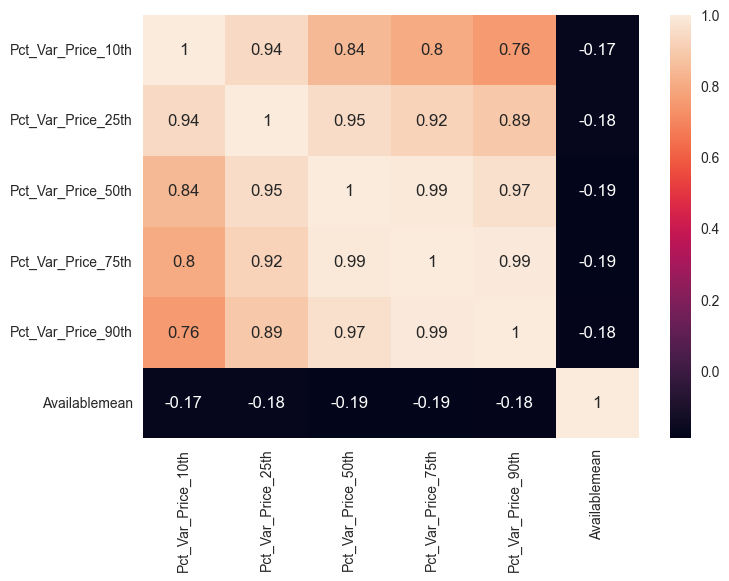

In [24]:
corr_df = price_df[['Pct_Var_Price_10th', 'Pct_Var_Price_25th',
       'Pct_Var_Price_50th', 'Pct_Var_Price_75th', 'Pct_Var_Price_90th',
       'Availablemean']]
sns.heatmap(corr_df.corr(), annot=True)

C:\Users\maiar\OneDrive\Data Material\Ascential - Analytics Engineering\venv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


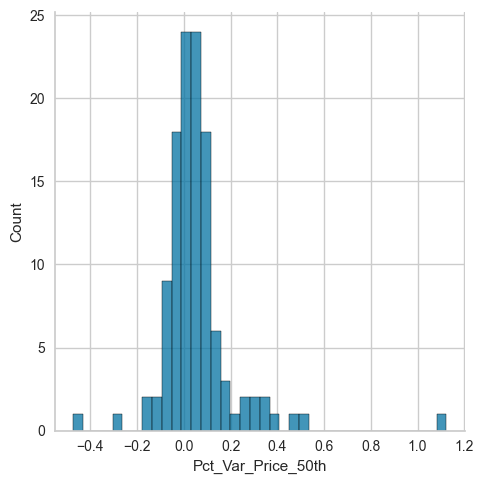

In [25]:
sns.displot(data=price_df, x='Pct_Var_Price_50th')

<Axes: xlabel='Pct_Var_Price_50th', ylabel='Pct_Var_Price_10th'>

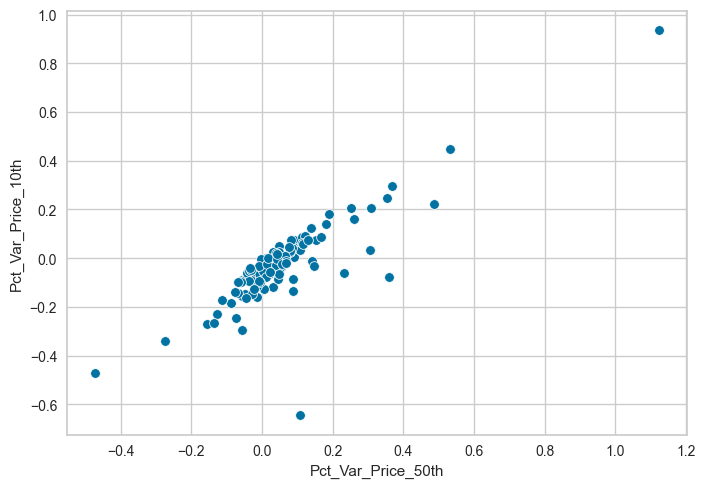

In [26]:
sns.scatterplot(data=price_df, y='Pct_Var_Price_10th', x='Pct_Var_Price_50th')

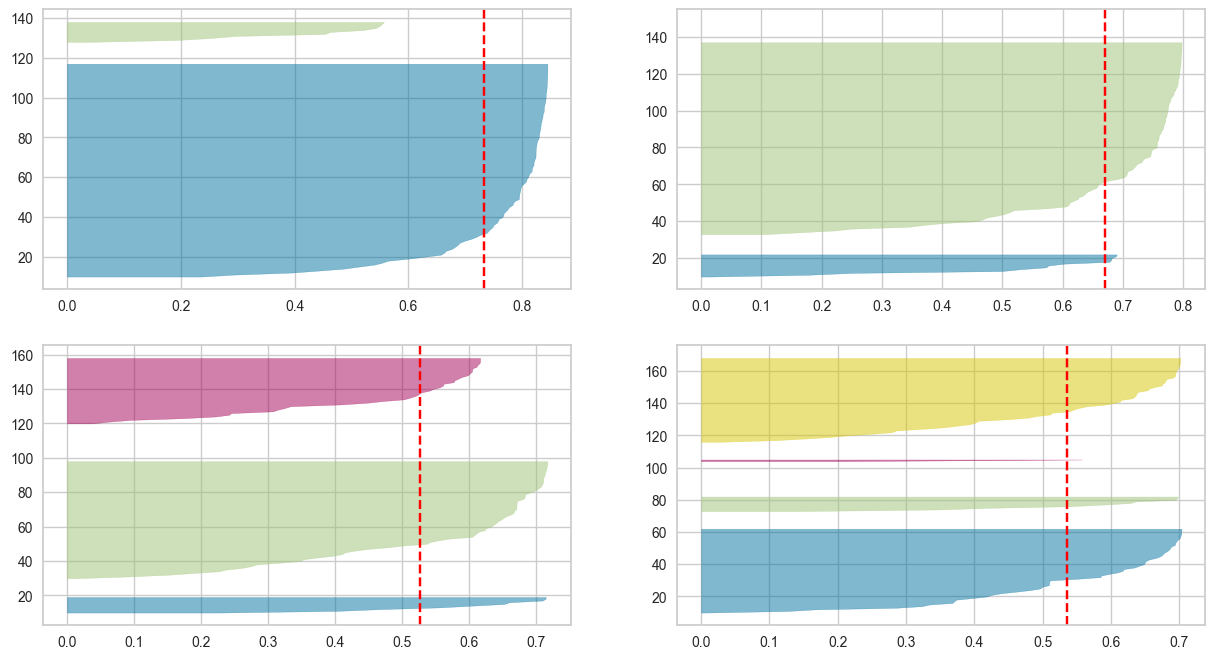

In [27]:
x = price_df[price_df['Pct_Var_Price_50th'].notnull()][['Pct_Var_Price_50th']]

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(x) 

In [28]:
x = price_df[price_df['Pct_Var_Price_50th'].notnull()][['Pct_Var_Price_50th', 'Retailer']]

In [29]:
kmeans = KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=100)
x['cluster'] = kmeans.fit_predict(x['Pct_Var_Price_50th'].array.reshape(-1, 1))

C:\Users\maiar\OneDrive\Data Material\Ascential - Analytics Engineering\venv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


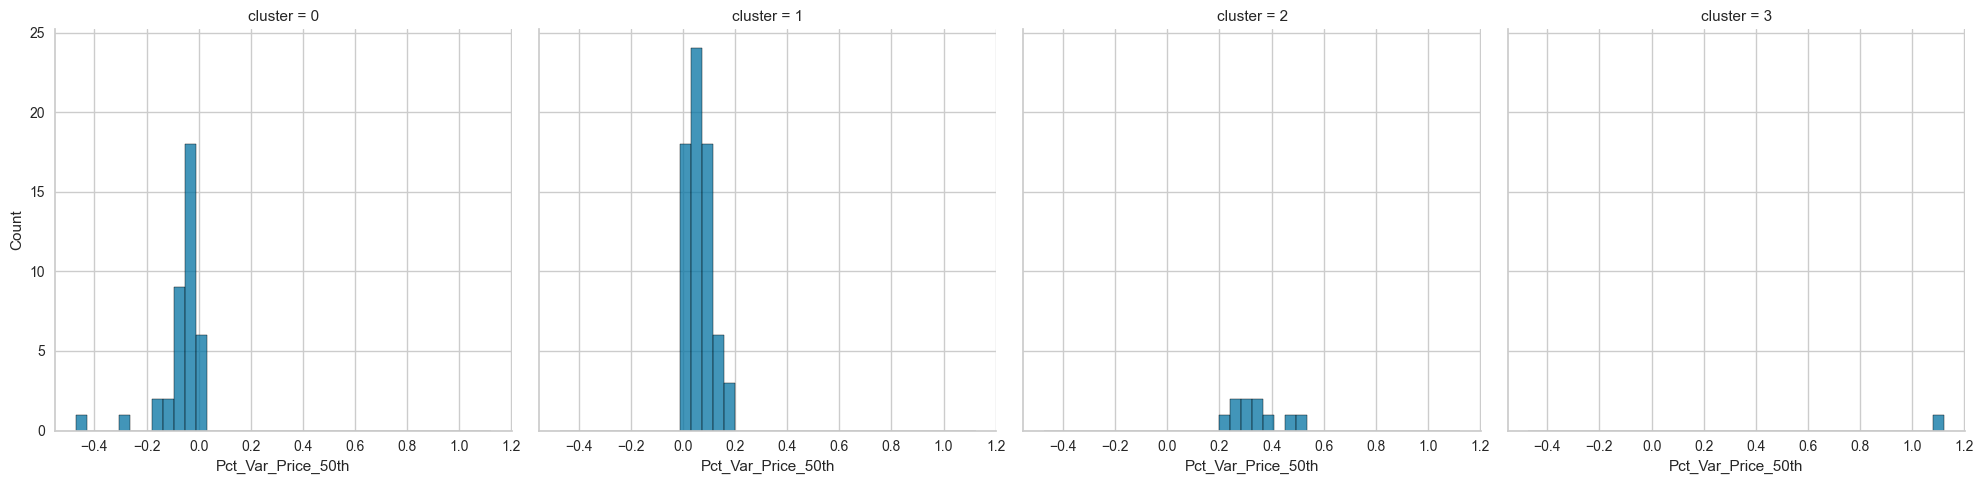

In [30]:
sns.displot(data=x, x='Pct_Var_Price_50th', col='cluster')

In [32]:
x[x['cluster'] == 0]

,Pct_Var_Price_50th,Retailer,cluster
1,-0.087208,Amazon,0
5,-0.013273,Apoio Entrega,0
7,-0.113553,Atacadão,0
11,-0.472274,Care Shop,0
13,-0.155771,Carrefour,0
14,-0.057440,Carrefour - Nações,0
16,-0.047638,Confiança Supermercados,0
17,-0.002920,Coop - Drogaria,0
31,-0.056066,Drogal,0
32,-0.038920,Drogaria Catarinense,0


In [33]:
x[x['cluster'] == 1]

,Pct_Var_Price_50th,Retailer,cluster
0,0.090252,A Nossa Drogaria,1
2,0.097311,Amazon - Apoteca,1
3,0.087159,Amazon - Sages,1
4,0.113863,Angeloni - Supermercado,1
6,0.019298,Araujo,1
...,...,...,...
109,0.049283,Sonda Delivery,1
110,0.022973,Sou Justo,1
111,0.057341,SuperNosso,1
113,0.190380,Supermercado Davó,1


In [34]:
x[x['cluster'] == 2]

,Pct_Var_Price_50th,Retailer,cluster
15,0.230837,ComperDelivery,2
19,0.308812,Cornershop - Atacadão - Ipiranga,2
42,0.531861,Farma Conde,2
49,0.486664,Festval,2
54,0.367672,Ifood - Nagumo - Pires do Rio,2
62,0.250582,Koch,2
73,0.358382,Mercado Livre - Drogão Popular,2
82,0.260109,Panvel,2
108,0.305673,Site Mercado - Nagumo,2
119,0.354423,Zona Sul,2


In [35]:
x[x['cluster'] == 3]

,Pct_Var_Price_50th,Retailer,cluster
75,1.122942,Mercado Livre - Olist,3


In [36]:
x['Retailer'].count()

119

In [48]:
z = x.groupby('cluster').agg({'Retailer':'count', 'Pct_Var_Price_50th':['min','max', 'mean']})
z['Pct_Total'] = z.apply(lambda i: i['Retailer']/x['Retailer'].count(), axis=1)

In [57]:
z.reset_index(inplace=True)

In [58]:
z['Pct_Total'].sum()

1.0000000000000002

In [61]:
x.to_csv('ML/results/retailer_clusters.csv', index=False)
z.to_csv('ML/results/clusters.csv', index=False)